In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
import os
from PIL import Image

images = []
ages = []
genders = []

# Specify the path to the directory containing your images
directory_path = r"D:\internship\code clause\data science\gender age detection\crop_part1"

# Iterate over the first 8000 files in the directory
for i in os.listdir(directory_path)[:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    
    # Use os.path.join to create the correct path for each image
    image_path = os.path.join(directory_path, i)
    
    # Open the image using PIL
    images.append(Image.open(image_path))


In [3]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

In [4]:
df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1


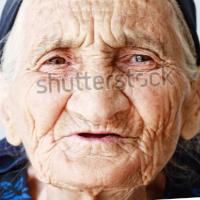

100 1


In [5]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

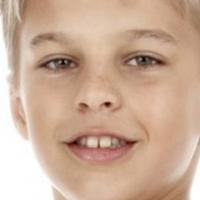

100 1


In [6]:
display(df['Images'][30])
print(df['Ages'][1], df['Genders'][1])

C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\409036286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

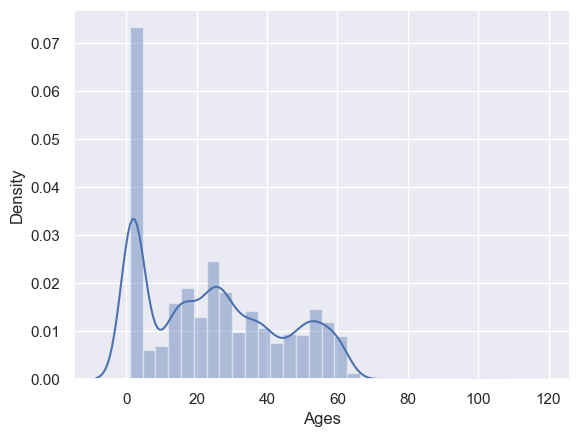

In [7]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [8]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\2036663787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

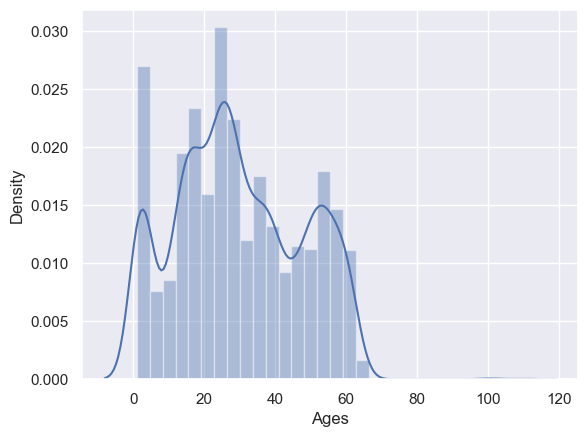

In [9]:
sns.distplot(df['Ages'],kde=True, bins=30)

In [10]:
df = df[df['Ages'] < 80]

C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

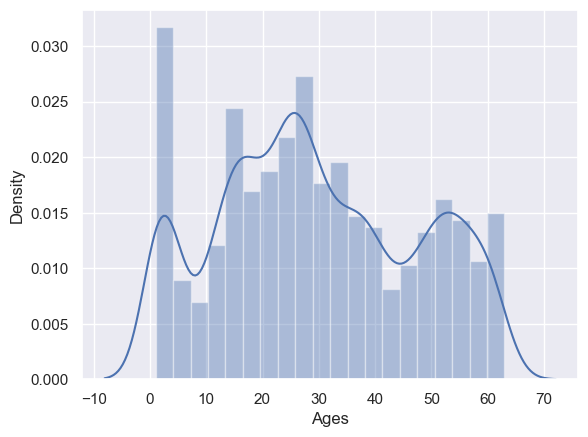

In [11]:
sns.distplot(df['Ages'],kde=True, bins=20)

In [12]:
print(df.columns)


Index(['Images', 'Ages', 'Genders'], dtype='object')


In [13]:
print(df.head())


                                              Images  Ages  Genders
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0
5  <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0
6  <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0
7  <PIL.JpegImagePlugin.JpegImageFile image mode=...    10        0


In [14]:
print(len(df))


6503


In [15]:
df = df.dropna(subset=['Genders'])


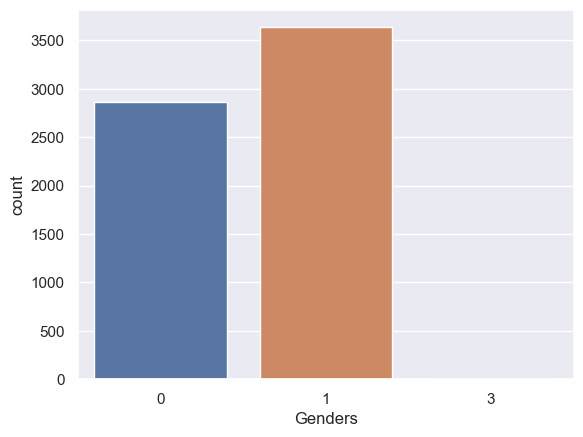

In [16]:
import matplotlib.pyplot as plt
sns.countplot(x='Genders', data=df)
plt.show()


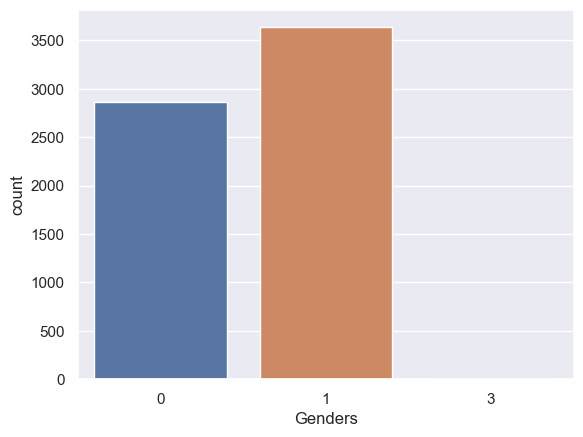

In [17]:
df['Genders'] = pd.Categorical(df['Genders'])
sns.countplot(x='Genders', data=df)
plt.show()


In [18]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\2993096863.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\2993096863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [19]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
#x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(x, y_gender):
    x_train_gender, x_test_gender = x[train_index], x[test_index]
    y_train_gender, y_test_gender = y_gender.iloc[train_index], y_gender.iloc[test_index]


C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [21]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))
agemodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])
genmodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

In [22]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=20, shuffle=True, validation_data=test2)


Epoch 1/20
82/82 [==============================] - 812s 10s/step - loss: 0.2132 - val_loss: 0.1688
Epoch 2/20
82/82 [==============================] - 433s 5s/step - loss: 0.1787 - val_loss: 0.1498
Epoch 3/20
82/82 [==============================] - 412s 5s/step - loss: 0.1658 - val_loss: 0.1680
Epoch 4/20
82/82 [==============================] - 434s 5s/step - loss: 0.1567 - val_loss: 0.1378
Epoch 5/20
82/82 [==============================] - 1853s 23s/step - loss: 0.1476 - val_loss: 0.1283
Epoch 6/20
82/82 [==============================] - 1325s 16s/step - loss: 0.1478 - val_loss: 0.1291
Epoch 7/20
82/82 [==============================] - 6647s 82s/step - loss: 0.1466 - val_loss: 0.1303
Epoch 8/20
82/82 [==============================] - 383s 5s/step - loss: 0.1414 - val_loss: 0.1212
Epoch 9/20
82/82 [==============================] - 515s 6s/step - loss: 0.1355 - val_loss: 0.1185
Epoch 10/20
82/82 [==============================] - 422s 5s/step - loss: 0.1337 - val_loss: 0.1184
Ep

In [23]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=20, shuffle=True, validation_data=test1)


Epoch 1/20
163/163 [==============================] - 347s 2s/step - loss: -433.9171 - accuracy: 0.0492 - val_loss: -435.8985 - val_accuracy: 0.0500
Epoch 2/20
163/163 [==============================] - 350s 2s/step - loss: -437.1417 - accuracy: 0.0496 - val_loss: -435.8985 - val_accuracy: 0.0500
Epoch 3/20
163/163 [==============================] - 354s 2s/step - loss: -437.1419 - accuracy: 0.0496 - val_loss: -435.8985 - val_accuracy: 0.0500
Epoch 4/20
163/163 [==============================] - 352s 2s/step - loss: -437.1418 - accuracy: 0.0496 - val_loss: -435.8985 - val_accuracy: 0.0500
Epoch 5/20
163/163 [==============================] - 350s 2s/step - loss: -437.1417 - accuracy: 0.0496 - val_loss: -435.8984 - val_accuracy: 0.0500
Epoch 6/20
163/163 [==============================] - 355s 2s/step - loss: -437.1419 - accuracy: 0.0496 - val_loss: -435.8985 - val_accuracy: 0.0500
Epoch 7/20
163/163 [==============================] - 488s 3s/step - loss: -437.1418 - accuracy: 0.0496 - 

In [24]:
genmodel.save("gender_model.h5")
agemodel.save("age_model.h5")

C:\Users\deepa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\3568660155.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


1/1 [==============================] - 0s 100ms/step

 Gender: male


C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\3568660155.py:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return im.resize((300,300), Image.ANTIALIAS)


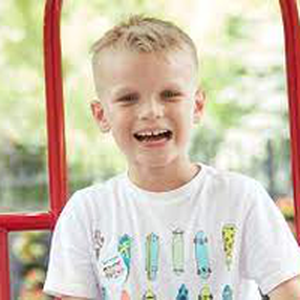

In [39]:
process_and_predict(r"C:\Users\deepa\Downloads\download (4).jpeg")

C:\Users\deepa\AppData\Local\Temp\ipykernel_4820\3568660155.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((200,200), Image.ANTIALIAS)


UnboundLocalError: cannot access local variable 'ar' where it is not associated with a value